# Portfolio Optimization

### References:
1. [Markowitz by Plotly](https://plotly.com/python/v3/ipython-notebooks/markowitz-portfolio-optimization/)
1. [Efficient Frontier Portfolio Optimisation in Python](https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f)
1. [Markowitz’s Efficient Frontier in Python [Part 1/2]](https://medium.com/python-data/effient-frontier-in-python-34b0c3043314)
1. [Efficient Frontier & Portfolio Optimization with Python [Part 2/2]](https://medium.com/python-data/efficient-frontier-portfolio-optimization-with-python-part-2-2-2fe23413ad94)

In [1]:
import pandas as pd
import scipy.optimize as sco
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
from IPython.display import HTML


init_notebook_mode(connected=True)

pd.options.display.float_format = '{:,.2f}'.format

%matplotlib inline
%config InlineBackend.figure_format='retina'
pio.templates.default = "none"

listings_source = pd.read_csv('../data/interim/valuation.csv')

In [2]:
listings = listings_source.copy()

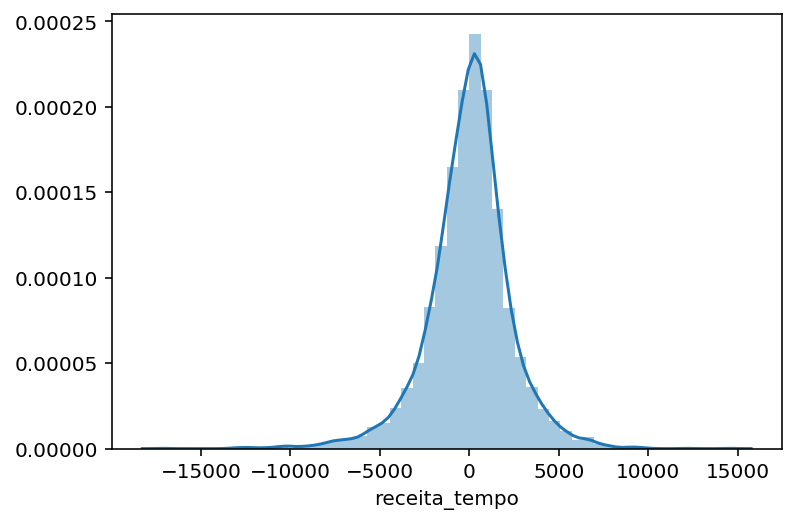

In [3]:
sns.distplot(listings['receita_tempo'],hist=True,kde=True)
plt.show()

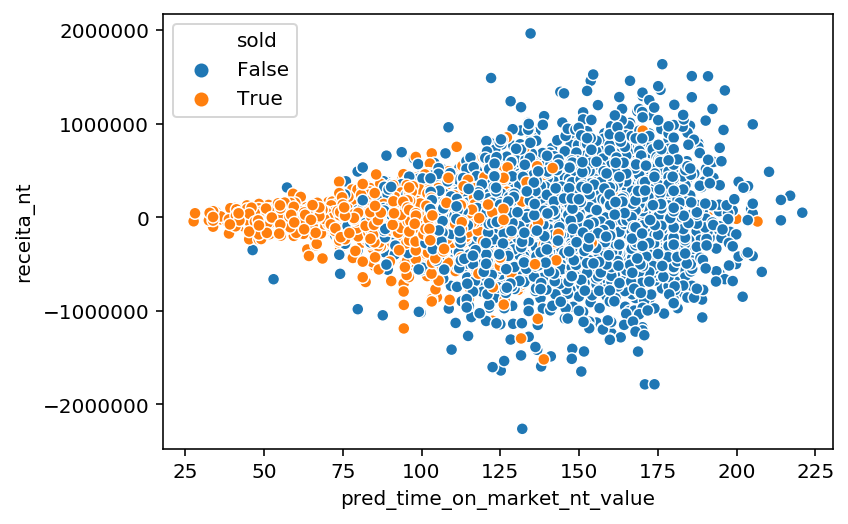

In [4]:
sns.scatterplot(x=listings['pred_time_on_market_nt_value'],y=listings['receita_nt'],hue=listings['sold'])
plt.show()

In [5]:
listings

,rooms,garages,useful_area,latitude,longitude,value,interior_quality,pred_nt_value,receita_nt,sinal_receita_nt,pred_time_on_market_source,pred_time_on_market_nt_value,time_on_market_agg,receita_tempo,sold_proba,sold
0,2.00,1.00,57,-23.61,-46.63,454377,2,"488,744.03","34,367.03",1.00,73.99,70.02,"(60, 75]",490.80,0.71,True
1,3.00,2.00,120,-23.56,-46.66,1500960,1,"1,384,365.40","-116,594.62",-1.00,109.13,120.79,"(120, 135]",-965.30,0.47,False
2,2.00,2.00,80,-23.56,-46.70,1045980,3,"988,797.50","-57,182.50",-1.00,147.66,147.66,"(135, 150]",-387.25,0.30,False
3,3.00,4.00,500,-23.51,-46.65,3707770,3,"3,539,147.80","-168,622.25",-1.00,114.50,131.75,"(120, 135]","-1,279.88",0.44,False
4,3.00,2.00,122,-23.52,-46.72,1007670,2,"1,261,779.10","254,109.12",1.00,118.99,121.57,"(120, 135]","2,090.31",0.68,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3.00,3.00,148,-23.63,-46.70,1276480,3,"1,593,822.40","317,342.38",1.00,103.02,123.65,"(120, 135]","2,566.45",0.44,False
8364,4.00,4.00,336,-23.59,-46.72,3543890,1,"3,738,609.50","194,719.50",1.00,115.03,199.25,"(195, 210]",977.28,0.08,False
8365,3.00,2.00,110,-23.58,-46.64,1088360,1,"1,020,251.56","-68,108.44",-1.00,129.79,97.84,"(90, 105]",-696.15,0.66,True
8366,3.00,1.00,190,-23.56,-46.67,2727660,1,"2,236,008.20","-491,651.75",-1.00,126.95,154.55,"(150, 165]","-3,181.23",0.38,False


In [40]:
listings['multiplicador'] = listings['pred_nt_value'] / listings['value']
listings['receita_tempo_esperado'] = listings['receita_tempo'] * listings['sold_proba']

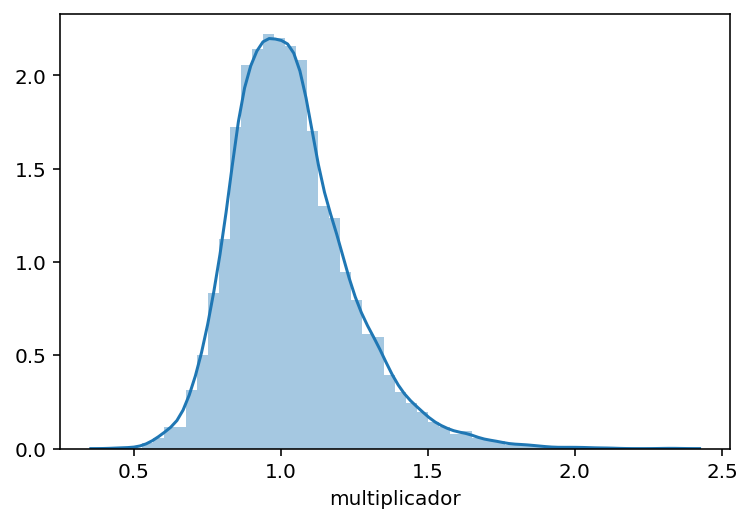

In [41]:
sns.distplot(listings['multiplicador'],hist=True,kde=True)
plt.show()

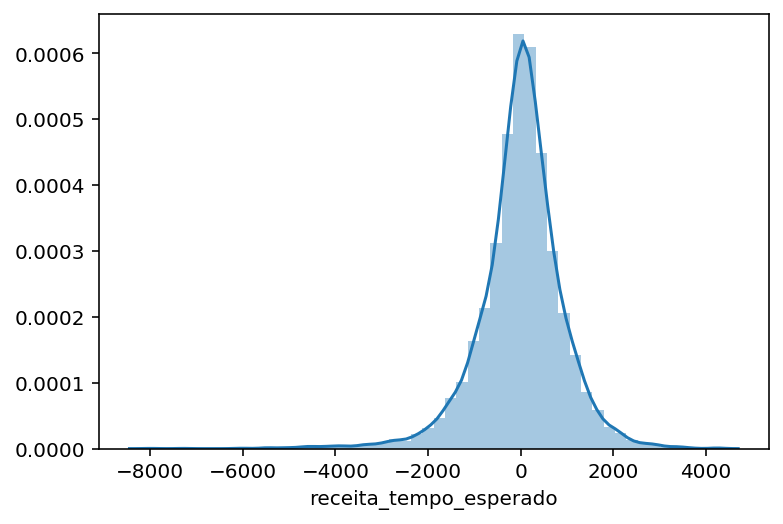

In [32]:
sns.distplot(listings['receita_tempo_esperado'],hist=True,kde=True)
plt.show()

___
## OLD

>A good portfolio is more than a long list of good stocks and bonds. It is a balanced whole, providing the investor with protections and opportunities with respect to a wide range of contingencies.

<p style="text-align:right;">Harry Markowitz</p>

A teoria dos portólios moderna assume os seguintes pressupostos:
1. Os investidores são avessos a risco, preferindo o investimento menos arriscado quando confrontados com o mesmo retorno esperado
1. Diversificação como forma de redução de risco

Observações:
O retorno do portólio é a média ponderada de cada asset; o mesmo não é verdade no caso do risco pois a volatilidade dos assets pode estar correlacionada.
A diversificação da carteira pode ser menor do que o menor risco entre os assets.

## Simular usando monte-carlo?

In [8]:
listings.sort_values(by='receita_tempo',ascending=False)

,rooms,garages,useful_area,latitude,longitude,value,interior_quality,pred_nt_value,receita_nt,sinal_receita_nt,pred_time_on_market_source,pred_time_on_market_nt_value,time_on_market_agg,receita_tempo,sold_proba,sold
561,1.00,5.00,384,-23.55,-46.66,2536710,2,"4,502,548.00","1,965,838.00",1.00,97.61,134.60,"(120, 135]","14,604.75",0.16,False
6515,4.00,6.00,400,-23.57,-46.59,1839720,2,"3,329,563.80","1,489,843.75",1.00,77.30,122.06,"(120, 135]","12,205.46",0.23,False
4015,3.00,3.00,355,-23.60,-46.72,1731870,2,"3,259,272.00","1,527,402.00",1.00,88.11,154.48,"(150, 165]","9,887.52",0.10,False
2363,4.00,5.00,337,-23.54,-46.57,2378400,2,"3,619,901.80","1,241,501.75",1.00,99.17,128.27,"(120, 135]","9,678.83",0.20,False
2213,4.00,5.00,354,-23.55,-46.65,2535310,2,"3,995,771.80","1,460,461.75",1.00,128.43,153.69,"(150, 165]","9,502.81",0.04,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,4.00,4.00,337,-23.62,-46.73,3219930,3,"2,032,747.90","-1,187,182.12",-1.00,154.35,94.37,"(90, 105]","-12,579.78",0.64,True
7224,4.00,6.00,472,-23.50,-46.64,4367840,3,"2,954,262.80","-1,413,577.25",-1.00,134.47,109.53,"(105, 120]","-12,905.55",0.39,False
6559,4.00,4.00,313,-23.62,-46.74,3730410,1,"2,129,762.20","-1,600,647.75",-1.00,141.59,122.54,"(120, 135]","-13,062.23",0.30,False
3048,3.00,1.00,400,-23.59,-46.65,4342370,2,"2,705,692.80","-1,636,677.25",-1.00,142.35,125.14,"(120, 135]","-13,078.60",0.11,False


### Investimento nos imóveis com maior receita_tempo e probabilidade de venda > 50% até um investimento total(value) de R$150 Mi

In [21]:
safe = listings[(listings['sold'] == True) & (listings['receita_tempo'] > 0)].sort_values(by='receita_tempo',ascending=False)
safe.head()

,rooms,garages,useful_area,latitude,longitude,value,interior_quality,pred_nt_value,receita_nt,sinal_receita_nt,pred_time_on_market_source,pred_time_on_market_nt_value,time_on_market_agg,receita_tempo,sold_proba,sold
905,3.00,4.00,311,-23.51,-46.65,2306240,1,"3,060,547.00","754,307.00",1.00,74.28,111.14,"(105, 120]","6,786.97",0.62,True
8281,3.00,4.00,311,-23.51,-46.65,2306240,3,"3,060,547.00","754,307.00",1.00,111.24,111.14,"(105, 120]","6,786.97",0.62,True
341,3.00,4.00,311,-23.51,-46.65,2306240,3,"3,060,547.00","754,307.00",1.00,111.24,111.14,"(105, 120]","6,786.97",0.62,True
4666,4.00,4.00,234,-23.61,-46.72,1001630,2,"1,856,840.20","855,210.25",1.00,65.48,127.08,"(120, 135]","6,729.48",0.51,True
2247,3.00,3.00,230,-23.64,-46.73,930335,1,"1,614,519.50","684,184.50",1.00,75.97,103.24,"(90, 105]","6,626.91",0.56,True


In [22]:
safe['investimento_acumulado'] = safe['value'].cumsum()

In [24]:
safe[safe['investimento_acumulado']<150000000]

,rooms,garages,useful_area,latitude,longitude,value,interior_quality,pred_nt_value,receita_nt,sinal_receita_nt,pred_time_on_market_source,pred_time_on_market_nt_value,time_on_market_agg,receita_tempo,sold_proba,sold,investimento_acumulado
905,3.00,4.00,311,-23.51,-46.65,2306240,1,"3,060,547.00","754,307.00",1.00,74.28,111.14,"(105, 120]","6,786.97",0.62,True,2306240
8281,3.00,4.00,311,-23.51,-46.65,2306240,3,"3,060,547.00","754,307.00",1.00,111.24,111.14,"(105, 120]","6,786.97",0.62,True,4612480
341,3.00,4.00,311,-23.51,-46.65,2306240,3,"3,060,547.00","754,307.00",1.00,111.24,111.14,"(105, 120]","6,786.97",0.62,True,6918720
4666,4.00,4.00,234,-23.61,-46.72,1001630,2,"1,856,840.20","855,210.25",1.00,65.48,127.08,"(120, 135]","6,729.48",0.51,True,7920350
2247,3.00,3.00,230,-23.64,-46.73,930335,1,"1,614,519.50","684,184.50",1.00,75.97,103.24,"(90, 105]","6,626.91",0.56,True,8850685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,3.00,3.00,200,-23.63,-46.65,1406640,1,"1,653,807.10","247,167.12",1.00,56.81,87.71,"(75, 90]","2,818.05",0.60,True,146209946
4384,3.00,2.00,120,-23.55,-46.69,976216,2,"1,268,400.10","292,184.12",1.00,72.00,103.84,"(90, 105]","2,813.75",0.50,True,147186162
3370,4.00,2.00,138,-23.58,-46.62,1001020,1,"1,323,992.50","322,972.50",1.00,92.25,114.95,"(105, 120]","2,809.68",0.58,True,148187182
1924,3.00,2.00,120,-23.55,-46.65,922548,2,"1,214,289.60","291,741.62",1.00,69.92,103.99,"(90, 105]","2,805.59",0.51,True,149109730


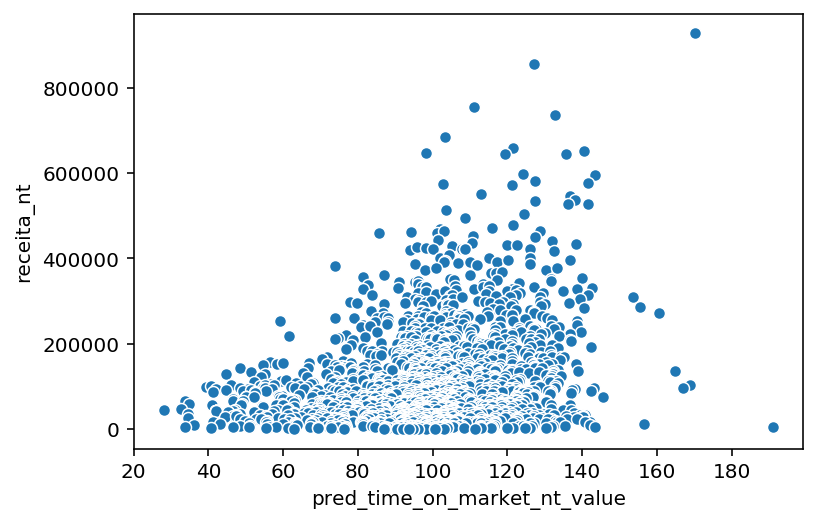

In [39]:
sns.scatterplot(x=safe['pred_time_on_market_nt_value'],y=safe['receita_nt'])
plt.show()

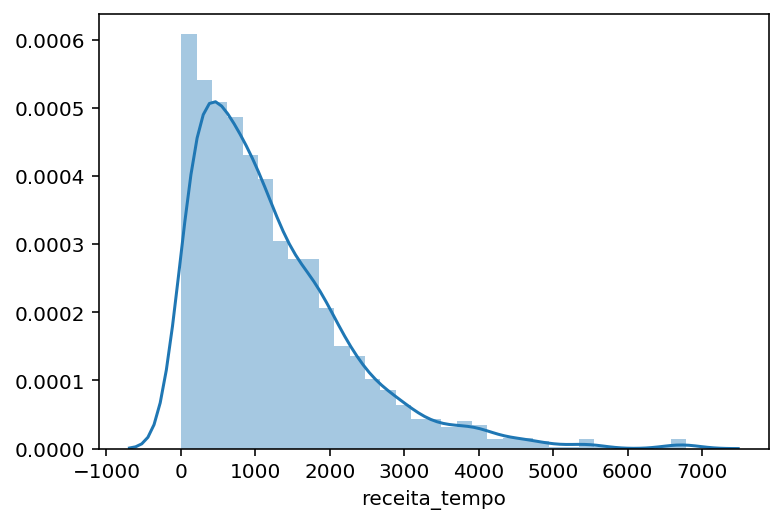

In [38]:
sns.distplot(safe['receita_tempo'],hist=True,kde=True)
plt.show()

In [34]:
safe[safe['receita_nt'] == 926740.25]

,rooms,garages,useful_area,latitude,longitude,value,interior_quality,pred_nt_value,receita_nt,sinal_receita_nt,pred_time_on_market_source,pred_time_on_market_nt_value,time_on_market_agg,receita_tempo,sold_proba,sold,investimento_acumulado
6656,4.00,3.00,195,-23.57,-46.66,1985550,2,"2,912,290.20","926,740.25",1.00,132.44,170.23,"(165, 180]","5,444.01",0.54,True,14387778
